# Model: Long Short-Term Memory (LSTM)

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a Long Short Term Memory (LSTM) networks to predict the closing price of the S&P 500 Index using a dataset of past prices based on closing price of the Trump Twitter Index. 

This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of the S&P500 Index, using the past 30 day stock price of the Trump Twitter Index.

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). 

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. 

Common Architecture of LSTM:
- Input gate: The input gate adds information to the cell state
- Forget gate: It removes the information that is no longer required by the model
- Output gate: Output Gate at LSTM selects the information to be shown as output

In [1]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
# Import trading data from January 20, 2017 to January 20, 2020
df = pd.read_csv('../datasets/tweets/combined_trump_index.csv', sep='\t')

In [3]:
df

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,vader sentiment,Trump Twitter Index,Close_TTI,Volume_TTI
0,1,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,positive,0.135696,2269.965939,8.042219e+09
1,2,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,positive,-0.056192,2267.777551,1.557123e+09
2,3,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,positive,0.908453,2267.919940,6.440903e+09
3,4,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,positive,0.312087,2288.893518,2.894899e+09
4,5,2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,negative,0.041381,2298.631683,-1.761134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,750,2020-01-13,3288.129883,3268.429932,3271.129883,3288.129883,3456380000,3288.129883,0.006976,0.005197,0.075759,0.177004,0.602734,268945,1381607,-0.7894,negative,-0.410250,3271.117341,-2.728466e+09
750,751,2020-01-14,3294.250000,3277.189941,3285.350098,3283.149902,3665130000,3283.149902,-0.001515,-0.000670,0.060396,-0.084540,0.520570,291642,1396729,4.0937,positive,-0.274155,3285.341753,1.500394e+10
751,752,2020-01-15,3298.659912,3280.689941,3282.270020,3289.290039,3716840000,3289.290039,0.001870,0.002139,0.014109,-0.026800,0.547750,99948,424979,1.2886,positive,0.275602,3282.278416,4.789520e+09
752,753,2020-01-16,3317.110107,3302.820068,3302.969971,3316.810059,3535080000,3316.810059,0.008367,0.004190,-0.048902,0.415893,0.432662,295611,1444412,4.3147,positive,1.807943,3303.024708,1.525281e+10


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Adj Close', 'Return', 'Intraday Return', 'Volume Return',
       'Open-Close Movement', 'High-Low Ratio', 'retweet_count',
       'favorite_count', 'vader compound', 'vader sentiment',
       'Trump Twitter Index', 'Close_TTI', 'Volume_TTI'],
      dtype='object')

In [5]:
# Drop irrelevant columns
df.drop(columns = ['Unnamed: 0', 'High', 'Low', 'Open', 'Volume',
       'Adj Close', 'Intraday Return', 'Volume Return',
       'Open-Close Movement', 'High-Low Ratio', 'retweet_count',
       'favorite_count', 'vader compound', 'vader sentiment'], axis=1, inplace = True)

In [6]:
df

,Date,Close,Return,Trump Twitter Index,Close_TTI,Volume_TTI
0,2017-01-20,2271.310059,0.003366,0.135696,2269.965939,8.042219e+09
1,2017-01-23,2265.199951,-0.002690,-0.056192,2267.777551,1.557123e+09
2,2017-01-24,2280.070068,0.006565,0.908453,2267.919940,6.440903e+09
3,2017-01-25,2298.370117,0.008026,0.312087,2288.893518,2.894899e+09
4,2017-01-26,2296.679932,-0.000735,0.041381,2298.631683,-1.761134e+09
...,...,...,...,...,...,...
749,2020-01-13,3288.129883,0.006976,-0.410250,3271.117341,-2.728466e+09
750,2020-01-14,3283.149902,-0.001515,-0.274155,3285.341753,1.500394e+10
751,2020-01-15,3289.290039,0.001870,0.275602,3282.278416,4.789520e+09
752,2020-01-16,3316.810059,0.008367,1.807943,3303.024708,1.525281e+10


In [7]:
# Get the number of rows and columns in the data set
df.shape

(754, 6)

In [8]:
# Preprocess data
df.index = pd.DatetimeIndex(df['Date'])
df.sort_index(ascending=True, inplace=True)
df.drop('Date', axis=1, inplace=True)
df=df.loc[:'2020-01-20',:]

/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


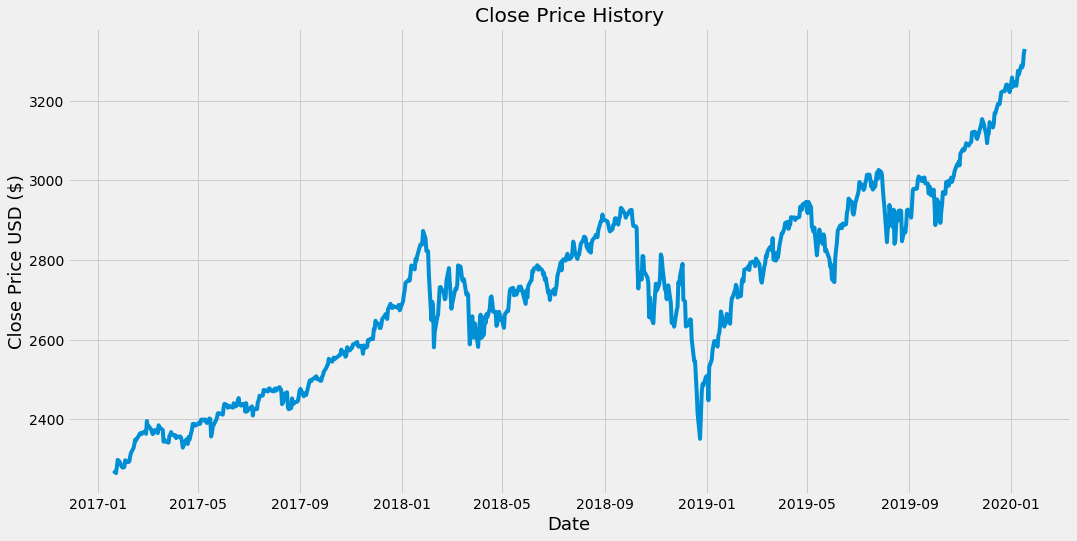

In [9]:
# Visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close_TTI'])

# Convert the dataframe to a numpy array
dataset = data.values

# Create a variable to store the length of the training data set 
# I  want the  training data set to contain about 80% of the data. 
# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8 ) 

# Length is about 80% of the original data
training_data_len

604

In [11]:
df.shape

(754, 5)

In [12]:
len(df)*0.8

603.2

In [13]:
# Scale the data to be values between 0 and 1 inclusive
# In practice it is nearly always advantageous to apply pre-processing transformations/ scaling/ normalisation to the input data before it is presented to a network 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.07251285e-03],
       [0.00000000e+00],
       [1.34849280e-04],
       [1.99978815e-02],
       [2.92204136e-02],
       [2.95769060e-02],
       [1.72638466e-02],
       [5.92783427e-03],
       [1.68871437e-02],
       [8.45810209e-03],
       [1.96661767e-02],
       [2.51069737e-02],
       [2.66133266e-02],
       [2.06368402e-02],
       [2.74101852e-02],
       [4.21292049e-02],
       [5.11152558e-02],
       [5.52480291e-02],
       [6.42159681e-02],
       [7.75337435e-02],
       [7.12430865e-02],
       [8.25030161e-02],
       [8.83941086e-02],
       [9.44447996e-02],
       [8.32617046e-02],
       [9.23055393e-02],
       [9.30962124e-02],
       [1.06412864e-01],
       [1.20237863e-01],
       [1.07150974e-01],
       [1.01763222e-01],
       [9.75093302e-02],
       [9.65972867e-02],
       [9.06494225e-02],
       [9.91963825e-02],
       [9.82898212e-02],
       [9.54319708e-02],
       [9.71769193e-02],
       [1.13546050e-01],
       [1.09771275e-01],


Create a training data set that contains the past 30 day closing price values that we want to use to predict the 30th closing price value.

So the first column in the ‘x_train’ data set will contain values from the data set from index 0 to index 29 (30 values total) and the second column will contain values from the data set from index 1 to index 30 (30 values) and so on and so forth.

The ‘y_train’ data set will contain the 31st value located at index 30 for it’s first column and the 32nd value located at index 31 of the data set for it’s second value and so on and so forth.

In [14]:
# Create the training data set
# Create the scaled training data set : :  a new array containing the scaled values from index 0 to 592
train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
# The independent training variables or training feature set 'X' (holds the stock price value for the past 30 days at position 'i-30')
    x_train.append(train_data[i-30:i, 0])

# The dependent training variables, or target, or training label set 'Y' (holds the stock price at the 11st day at position 'i-30')
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()


[array([0.00207251, 0.        , 0.00013485, 0.01999788, 0.02922041,
       0.02957691, 0.01726385, 0.00592783, 0.01688714, 0.0084581 ,
       0.01966618, 0.02510697, 0.02661333, 0.02063684, 0.02741019,
       0.0421292 , 0.05111526, 0.05524803, 0.06421597, 0.07753374,
       0.07124309, 0.08250302, 0.08839411, 0.0944448 , 0.0832617 ,
       0.09230554, 0.09309621, 0.10641286, 0.12023786, 0.10715097])]
[0.10176322195067389]

[array([0.00207251, 0.        , 0.00013485, 0.01999788, 0.02922041,
       0.02957691, 0.01726385, 0.00592783, 0.01688714, 0.0084581 ,
       0.01966618, 0.02510697, 0.02661333, 0.02063684, 0.02741019,
       0.0421292 , 0.05111526, 0.05524803, 0.06421597, 0.07753374,
       0.07124309, 0.08250302, 0.08839411, 0.0944448 , 0.0832617 ,
       0.09230554, 0.09309621, 0.10641286, 0.12023786, 0.10715097]), array([0.        , 0.00013485, 0.01999788, 0.02922041, 0.02957691,
       0.01726385, 0.00592783, 0.01688714, 0.0084581 , 0.01966618,
       0.02510697, 0.02661333, 0.

Now convert the independent train data set ‘x_train’ and dependent train data set ‘y_train’ to numpy arrays so they can be used for training the LSTM model.

In [15]:
# Convert the x_train and y_train to numpy arrays so we can use them for training the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
# A LSTM network expects the input to be 3-Dimensional in the form [samples, time steps, features]:
# samples is the number of data points (or rows/ records) we have, 
# time steps is the number of time-dependent steps that are there in a single data point (60),
# features/indicators refers to the number of variables we have for the corresponding true value in Y, since we are only using one feature 'Close',
# the number of features/indicators will be one


# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(574, 30, 1)

Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [17]:
# Build the LSTM model
model = Sequential()

# First LSTM layer, input_shape = the number of time steps (30 or x_train.shape[1]) while the last parameter is the number of features (1)
# Units=number of neurons, return_sequences is set to true since we will add more layers to the model.
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# LSTM layer with 50 neurons, return sequence by default is False but I put it here just to show
model.add(LSTM(50, return_sequences= False))

# Just your regular densely-connected Neural Network layer with 25 neurons
model.add(Dense(25))

# Just your regular densely-connected Neural Network layer with 1 neuron
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
# Compile the model using the mean squared error (MSE) loss function and the adam optimizer.
model.compile(optimizer='adam', loss='mean_squared_error')

# optimizer = adam and the optimizer is used to improve upon the loss
# loss function = mean_squared_error (MSE) and loss functions are used to measure how well the model did on training

In [19]:
# Fit/Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# batch size: Total number of training examples present in a single batch
# epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network


Epoch 1/1
574/574 [==============================] - 17s 30ms/step - loss: 0.0037


In [20]:
# Create the testing data set
# Create a new array containing scaled values from index 532 to 742, using the past 30 days 
test_data = scaled_data[training_data_len - 30: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    
# The independent testing variables or testing feature set 'X' (holds the stock price value for the past 30 days at position 'i-60')
    x_test.append(test_data[i-30:i, 0])

In [21]:
# Convert the data to a numpy array
# so it can be used to test and make predictions using the LSTM model created
x_test = np.array(x_test)

<b> Reshaping the variable to be 3-Dimensional in the form [samples, time steps, features] for the Neural Network </b>

A LSTM network expects the input to be 3-Dimensional in the form [samples, time steps, features]:
- samples is the number of data points (or rows/ records) we have, 
- time steps is the number of time-dependent steps that are there in a single data point (60),
- features/indicators refers to the number of variables we have for the corresponding true value in Y, since we are only using one feature 'Close',
- the number of features/indicators will be one





In [22]:
# Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [23]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Undo the scaling

In [24]:
# Evaluate predictions.
Score = mean_squared_error(y_test, predictions)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

# RMSE is a good measure of how accurately the model predicts the response
# (RMSE) is the standard deviation of the residuals (prediction errors).
# Lower values of RMSE indicate better fit. 

Score: 5731.83295667 MSE (75.70886974 RMSE)


75.70886973575605

> The LSTM model appears to perform better than the baseline model as RMSE of 37.73 is an improvement from the baseline RMSE of 108.84. However, the ARIMA model (with RMSE of 36.61) appears to perform slightly better than the LSTM. 

## Plot and visualise the data

/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


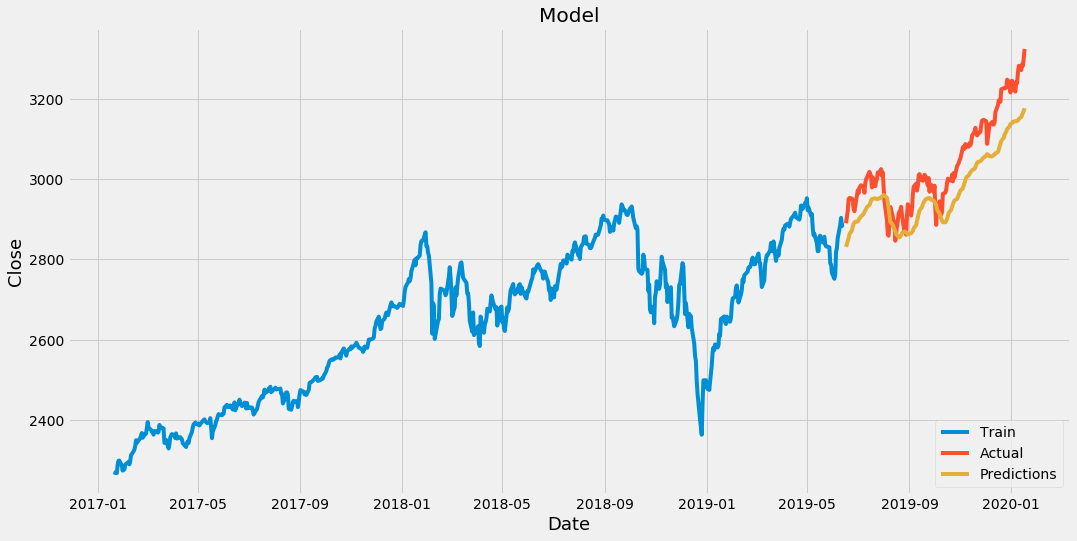

In [25]:
# Plot the data
train = data[:training_data_len]
actual = data[training_data_len:]
actual['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close_TTI'])
plt.plot(actual[['Close_TTI', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the actual and predicted prices
actual

,Close_TTI,Predictions
Date,,
2019-06-17,2889.749757,2831.001465
2019-06-18,2906.800465,2838.327393
2019-06-19,2920.550702,2845.471924
2019-06-20,2949.602277,2852.922607
2019-06-21,2952.719174,2862.223389
...,...,...
2020-01-13,3271.117341,3154.402588
2020-01-14,3285.341753,3159.431152
2020-01-15,3282.278416,3165.041016


## Test the LSTM Model and Obtain Predictions

To test the model - I want to predict the closing price value of S&P500 for March 24, 2020 (24/3/2020) using the above model and following steps:
- Obtain the quote and convert the data to an array that contains only the closing price. - Obtain the last 60 day closing price and scale the data to be values between 0 and 1 inclusive.
- Create an empty list and append the past 60 day price to it, and then convert it to a numpy array and reshape it in order to input the data into the model.
- Input the data into the model and obtain the predicted price.

In [27]:
# Get the quote
SP500_quote = web.DataReader('^GSPC', data_source='yahoo', start='2017-01-20', end='2020-01-21')

# Create a new dataframe
new_df = SP500_quote.filter(['Close'])

# Get the last 30 day closing price values and convert the dataframe to an array
last_30_days = new_df[-30:].values

# Scale the data to be values between 0 and 1
last_30_days_scaled = scaler.transform(last_30_days)

# Create an empty list
X_test = []

# Append the past 30 days
X_test.append(last_30_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3195.2927]]


In [28]:
# Get the quote of the actual price for that day was 
SP500_quote2 = web.DataReader('^GSPC', data_source='yahoo', start='2020-01-21', end='2020-01-21')
print(SP500_quote2['Close'])

Date
2020-01-21    3320.790039
Name: Close, dtype: float64


> From the above, on the date (2020-01-21), the model predicted a S&P 500 Index Close price of 3309.12, which gives an error of 0.35% from the actual Close price of 3320.79. It is evident that the LSTM model performed better than the baseline model which predicted an error difference of 204.58 (~6.16%). 
> 
> The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs. But it is not certain that the predictions from LSTM is enough to identify whether the stock price will increase or decrease as stock price is affected by the news about the company and other factors like demonetisation or merger/demerger of the companies. There are certain intangible factors as well which can often be impossible to predict beforehand.
> 
> Therefore, I attempted to implement a machine learning classifier to determine whether a stock is a Buy, Sell, or a Hold instead. Refer to the next notebook "3.4a_Model_Classification"